<a href="https://colab.research.google.com/github/moaoutir/Diabetes-Diagnostic/blob/main/Diabetes_Diagnostic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
url = 'https://raw.githubusercontent.com/moaoutir/Diabetes-Diagnostic/main/diabetes.csv'

df = pd.read_csv(url)
df.shape

(768, 9)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<ipython-input-4-c47296c6d2e2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Outcome",data=df,palette="magma")


<Axes: xlabel='Outcome', ylabel='count'>

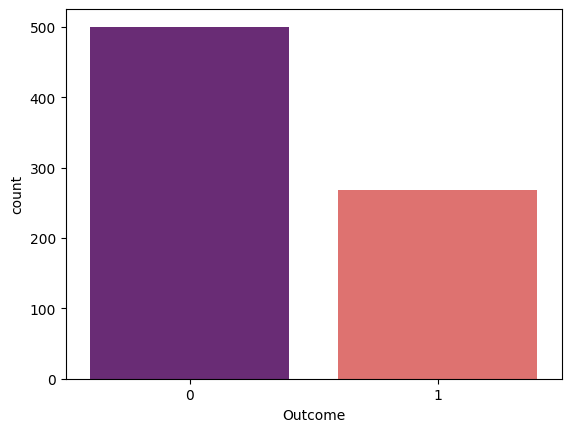

In [ ]:
sns.countplot(x = "Outcome",data=df,palette="magma")

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Checking and Removing null values**


In [ ]:
print(df.isnull().sum())
print((df.drop("Outcome",axis=1)).replace(0,np.NaN).isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [ ]:
def percent_missing_values(df):
  percent_nan = 100 * df.isnull().sum() / len(df)
  percent_nan = percent_nan[percent_nan > 0].sort_values(ascending=False)
  return percent_nan

In [ ]:

# Assigns the "Outcome" column back to the DataFrame using assign.
# df = (df.drop("Outcome",axis=1)).replace(0,np.NaN).assign(Outcome=df["Outcome"])
cols = ['Pregnancies' ,	'Glucose' ,	'BloodPressure' ,	'SkinThickness' ,	'Insulin' ,	'BMI' ,	'DiabetesPedigreeFunction' ,	'Age']
df[cols] = (df.drop("Outcome",axis=1)).replace(0,np.NaN)

In [ ]:
percent_nan = percent_missing_values(df)

In [ ]:
percent_nan

Insulin          48.697917
SkinThickness    29.557292
Pregnancies      14.453125
BloodPressure     4.557292
BMI               1.432292
Glucose           0.651042
dtype: float64

<ipython-input-11-04ad639dde1d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = percent_nan.index,y= percent_nan, palette='plasma')


Text(0, 0.5, 'percent missing values %')

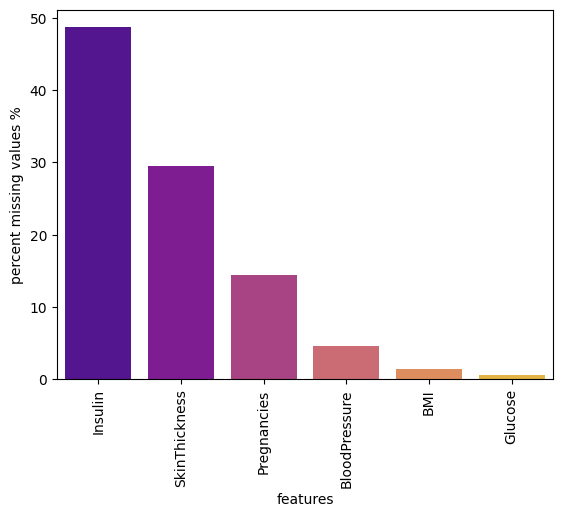

In [ ]:
sns.barplot(x = percent_nan.index,y= percent_nan, palette='plasma')
plt.xticks(rotation = 90)
plt.xlabel('features')
plt.ylabel('percent missing values %')

***Deleting lines***




<ipython-input-12-6a63ff794bab>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = percent_nan.index,y= percent_nan, palette='plasma')


(0.0, 1.0)

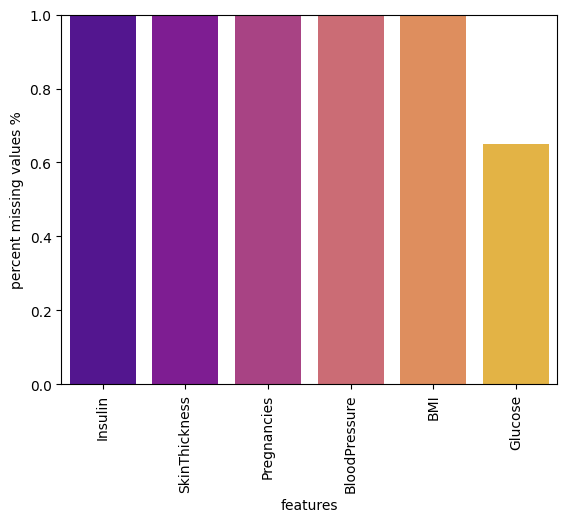

In [ ]:
sns.barplot(x = percent_nan.index,y= percent_nan, palette='plasma')
plt.xticks(rotation = 90)
plt.xlabel('features')
plt.ylabel('percent missing values %')
plt.ylim(0,1)

If a row contains missing values in critical columns and the number of these rows is low, it may be relevant to delete them so as not to introduce bias with imputed values.

In [ ]:
df[df['Glucose'].isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1.0,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1.0,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1.0,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5.0,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6.0,NaN,68.0,41.0,NaN,39.0,0.727,41,1


In [ ]:
df = df.dropna(axis = 0, subset=['Glucose'])

replace the corresponding value with the mean value.

In [ ]:
cols = ['Pregnancies' ,	'BloodPressure' ,	'SkinThickness' ,	'Insulin' ,	'BMI' ,	'DiabetesPedigreeFunction']
mean_cols = df[cols].mean()
print(mean_cols)
df[cols] = df[cols].fillna(mean_cols)
# interpolate : Utilisé lorsque les données sont séquentielles ou temporelles et que vous souhaitez estimer les valeurs manquantes en fonction des tendances ou des motifs dans les données.
#df[cols] = df[cols].interpolate()
df

Pregnancies                   4.507669
BloodPressure                72.438187
SkinThickness                29.149254
Insulin                     155.885496
BMI                          32.454654
DiabetesPedigreeFunction      0.472477
dtype: float64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,155.885496,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,155.885496,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.149254,155.885496,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4.507669,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,155.885496,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,29.149254,155.885496,30.1,0.349,47,1


In [ ]:
percent_nan = percent_missing_values(df)
percent_nan


Series([], dtype: float64)

<Axes: >

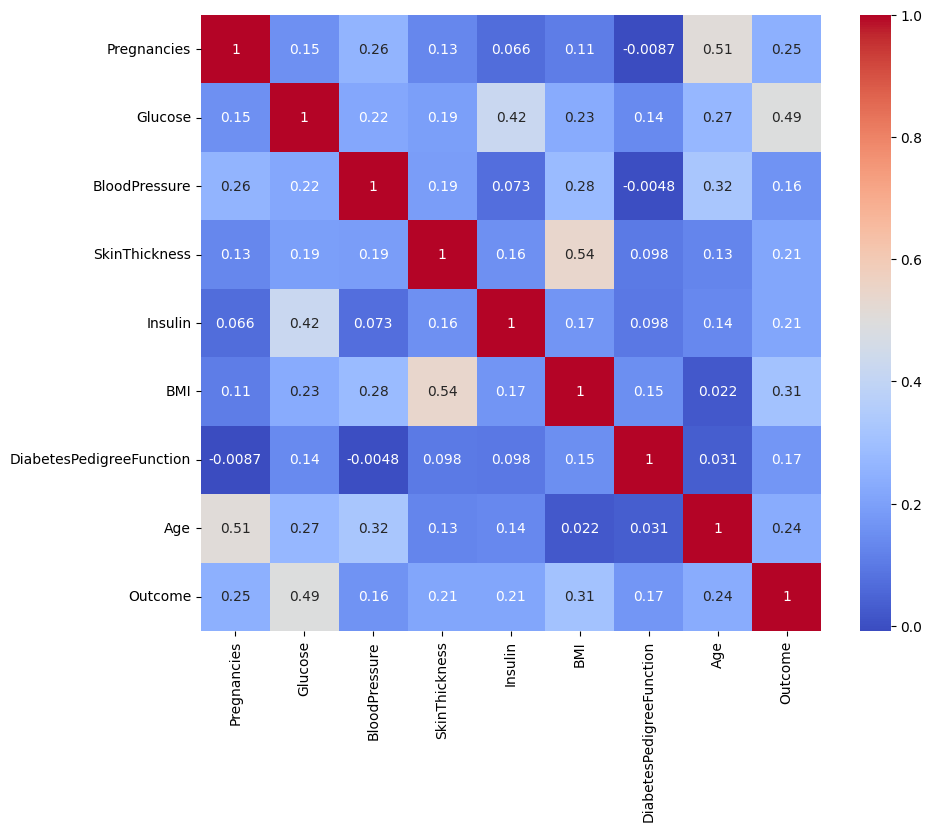

In [ ]:

correlation_matr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matr, annot=True, cmap='coolwarm')

In [ ]:
X = df.drop(columns="Outcome",axis = 1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Logistic Regression

In [ ]:
log_model = LogisticRegressionCV()
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [ ]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])
coefs = coefs.sort_values()
coefs

Insulin                    -0.009901
BloodPressure              -0.004175
SkinThickness               0.037753
DiabetesPedigreeFunction    0.151054
Age                         0.217859
Pregnancies                 0.244033
BMI                         0.465806
Glucose                     0.867230
dtype: float64

<ipython-input-24-f4e3989cc307>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.index,y=coefs.values,palette="magma")


<Axes: xlabel='coefficients'>

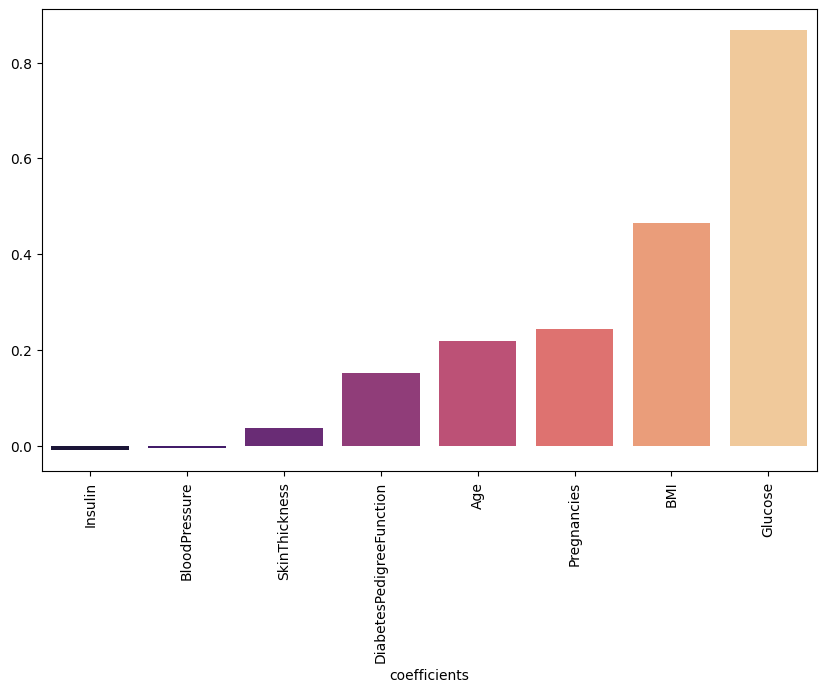

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
plt.xticks(rotation=90)
plt.xlabel("coefficients")
sns.barplot(x=coefs.index,y=coefs.values,palette="magma")

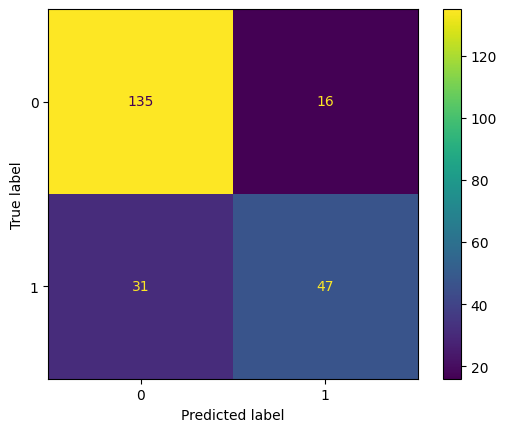

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test)

In [ ]:
pred = log_model.predict(scaled_X_test)

In [ ]:
log_model.score(scaled_X_test,y_test)

0.7947598253275109

# SVM

In [ ]:
svc = SVC(class_weight='balanced')

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid_svc = GridSearchCV(svc, param_grid)

In [ ]:
grid_svc.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [ ]:
grid_svc.best_params_

{'C': 1, 'gamma': 'auto'}

In [ ]:
grid_pred_svc = grid_svc.predict(scaled_X_test)

In [ ]:
grid_svc.score(scaled_X_test,y_test)

0.7510917030567685

# KNN

In [ ]:
print(classification_report(y_test,grid_pred_svc))

              precision    recall  f1-score   support

           0       0.89      0.72      0.79       151
           1       0.60      0.82      0.69        78

    accuracy                           0.75       229
   macro avg       0.74      0.77      0.74       229
weighted avg       0.79      0.75      0.76       229



In [ ]:
knn = KNeighborsClassifier()

In [ ]:
k_values = list(range(1,30))
param_grid = {'n_neighbors': k_values}

In [ ]:
grid = GridSearchCV(knn,param_grid)

In [ ]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]})

In [ ]:
grid.best_params_

{'n_neighbors': 24}

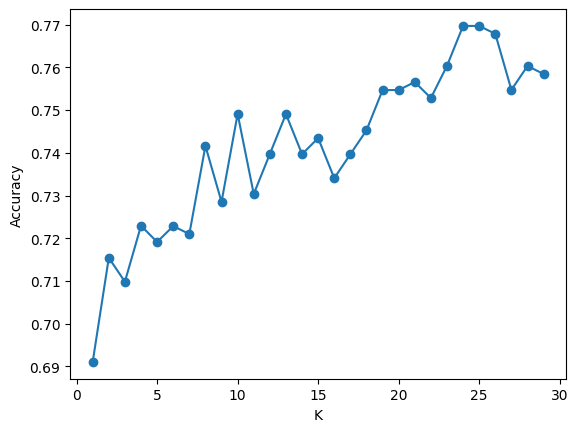

In [ ]:
scores = grid.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy");

In [ ]:
grid_pred = grid.predict(scaled_X_test)

In [ ]:
grid.score(scaled_X_test,y_test)

0.7903930131004366

# Decision tree

In [ ]:
tree_model = DecisionTreeClassifier(criterion="entropy",random_state=42)
tree_model.fit(scaled_X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
base_pred = tree_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
pd.DataFrame(index=X.columns, data=tree_model.feature_importances_, columns=['Feature Importance'])

,Feature Importance
Pregnancies,0.078933
Glucose,0.320655
BloodPressure,0.086951
SkinThickness,0.047312
Insulin,0.086810
BMI,0.143354
DiabetesPedigreeFunction,0.117183
Age,0.118802


In [ ]:
tree_model.score(scaled_X_test,y_test)

0.7292576419213974

# Naive Bayes Classifier

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

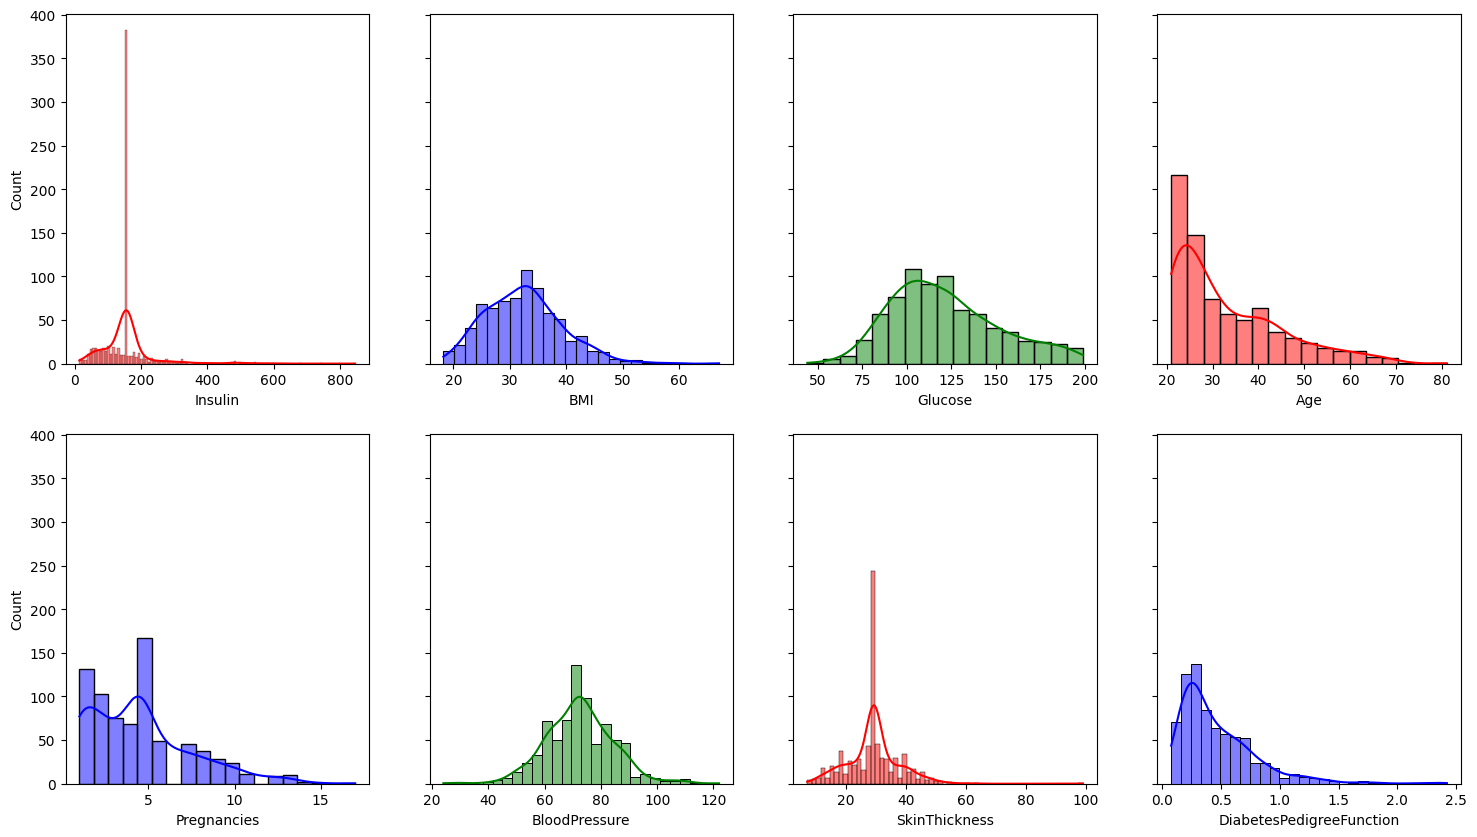

In [ ]:
fig, axis = plt.subplots(2, 4, figsize=(18, 10), sharey = True)
sns.histplot(data = df,ax=axis[0][0] , x = "Insulin", kde= True, color = "r")
sns.histplot(data = df,ax=axis[0][1] , x = "BMI", kde= True, color = "b")
sns.histplot(data = df,ax=axis[0][2] , x = "Glucose", kde= True, color = "g")
sns.histplot(data = df,ax=axis[0][3] , x = "Age", kde= True, color = "r")
sns.histplot(data = df,ax=axis[1][0] , x = "Pregnancies", kde= True, color = "b")
sns.histplot(data = df,ax=axis[1][1] , x = "BloodPressure", kde= True, color = "g")
sns.histplot(data = df,ax=axis[1][2] , x = "SkinThickness", kde= True, color = "r")
sns.histplot(data = df,ax=axis[1][3] , x = "DiabetesPedigreeFunction", kde= True, color = "b")


In [ ]:
df_NB = df[['BloodPressure', 'Glucose' ,'BMI' ,	'DiabetesPedigreeFunction','Outcome']]
X_NB = df_NB.drop(columns="Outcome",axis = 1)
y_NB = df_NB['Outcome']
X_train_NB, X_test, y_train_NB, y_test = train_test_split(X_NB, y_NB, test_size=0.3, random_state=42)
scaled_X_train_NB = scaler.fit_transform(X_train_NB)
scaled_X_test_NB = scaler.transform(X_test)

In [ ]:
naive_model = GaussianNB()

In [ ]:
naive_model.fit(X_train_NB, y_train_NB)

GaussianNB()

In [ ]:
naive_model.score(X_test,y_test)

0.7729257641921398

# Models Evaluation


              precision    recall  f1-score   support

           0       0.81      0.89      0.85       151
           1       0.75      0.60      0.67        78

    accuracy                           0.79       229
   macro avg       0.78      0.75      0.76       229
weighted avg       0.79      0.79      0.79       229

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       151
           1       0.73      0.62      0.67        78

    accuracy                           0.79       229
   macro avg       0.77      0.75      0.76       229
weighted avg       0.79      0.79      0.79       229

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       151
           1       0.60      0.64      0.62        78

    accuracy                           0.73       229
   macro avg       0.70      0.71      0.70       229
weighted avg       0.73      0.73      0.73       229



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.68      0.99      0.80       151
           1       0.86      0.08      0.14        78

    accuracy                           0.68       229
   macro avg       0.77      0.54      0.47       229
weighted avg       0.74      0.68      0.58       229



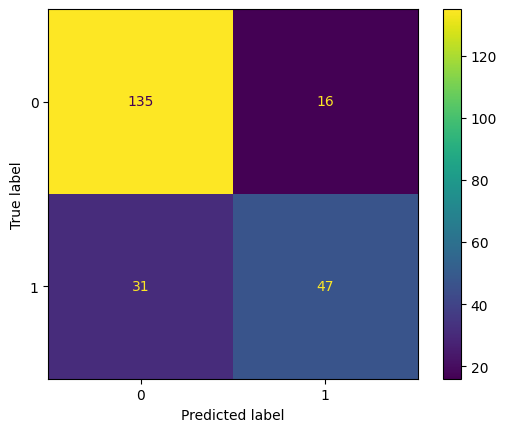

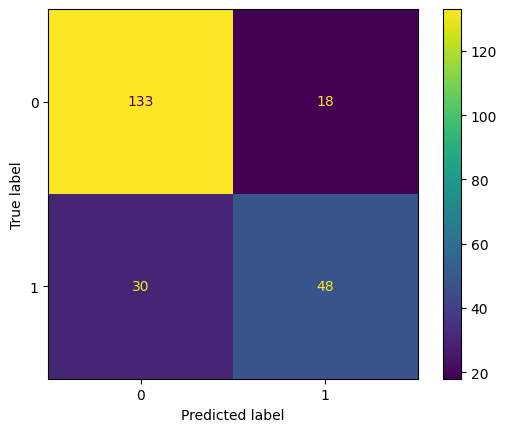

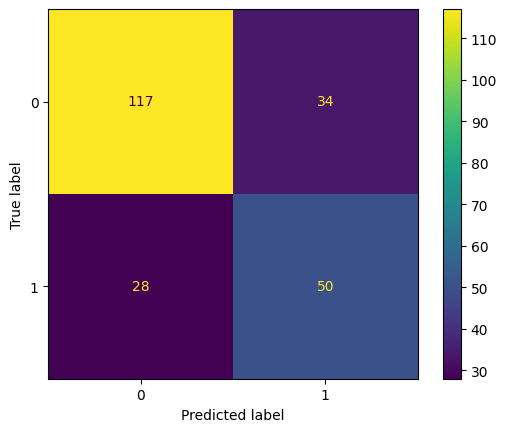

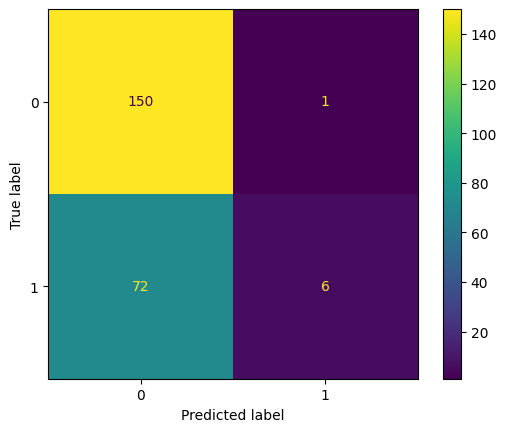

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Régression logistique
log_pred = log_model.predict(scaled_X_test)
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)
print(classification_report(y_test, log_pred))

# Autres modèles similaires
# SVM
# svc_pred = svc.predict(scaled_X_test)
# ConfusionMatrixDisplay.from_estimator(svc, X_test_scaled, y_test)
# print(classification_report(y_test, svc_pred))

# KNN
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(scaled_X_train,y_train)
knn_pred = knn.predict(scaled_X_test)
ConfusionMatrixDisplay.from_estimator(knn, scaled_X_test, y_test)
print(classification_report(y_test, knn_pred))

# Arbre de décision
tree_pred = tree_model.predict(scaled_X_test)
ConfusionMatrixDisplay.from_estimator(tree_model, scaled_X_test, y_test)
print(classification_report(y_test, tree_pred))

# Naive Bayes
nb_pred = naive_model.predict(scaled_X_test_NB)
ConfusionMatrixDisplay.from_estimator(naive_model, scaled_X_test_NB, y_test)
print(classification_report(y_test, nb_pred))

Matrices de Confusion :
pour chaque modèle sont présentées ci-dessous. Elles montrent le nombre de vraies prédictions positives, de vraies prédictions négatives, de faux positifs et de faux négatifs.


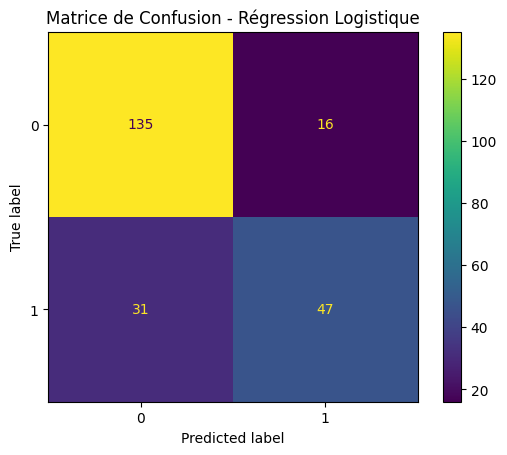

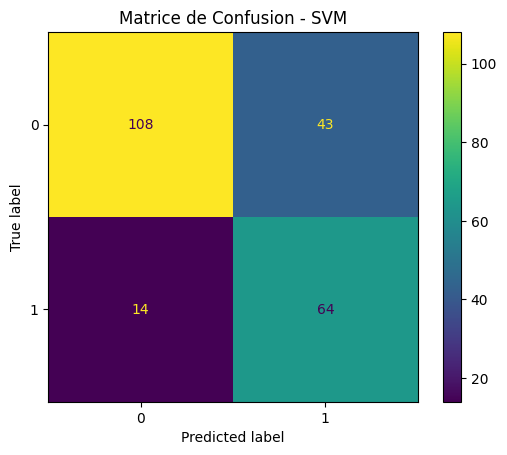

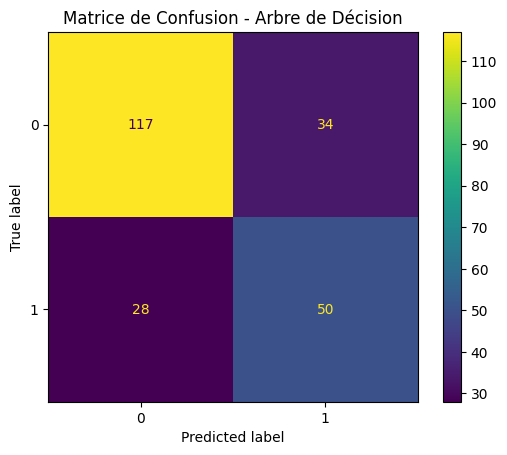

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


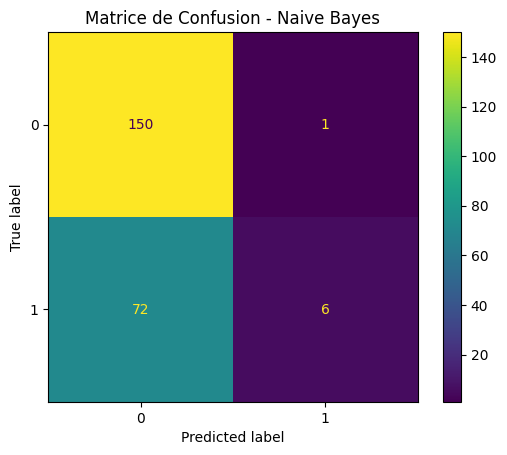

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Régression Logistique
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)
plt.title('Matrice de Confusion - Régression Logistique')
plt.show()

# SVM
ConfusionMatrixDisplay.from_estimator(grid_svc, scaled_X_test, y_test)
plt.title('Matrice de Confusion - SVM')
plt.show()

# KNN
# ConfusionMatrixDisplay.from_estimator(knn, scaled_X_test, y_test)
# plt.title('Matrice de Confusion - KNN')
# plt.show()

# Arbre de Décision
ConfusionMatrixDisplay.from_estimator(tree_model, scaled_X_test, y_test)
plt.title('Matrice de Confusion - Arbre de Décision')
plt.show()

# Naive Bayes
ConfusionMatrixDisplay.from_estimator(naive_model, scaled_X_test_NB, y_test)
plt.title('Matrice de Confusion - Naive Bayes')
plt.show()


Courbes ROC : Les courbes ROC permettent de visualiser la performance des modèles en termes de taux de vrais positifs (sensibilité) et de taux de faux positifs.

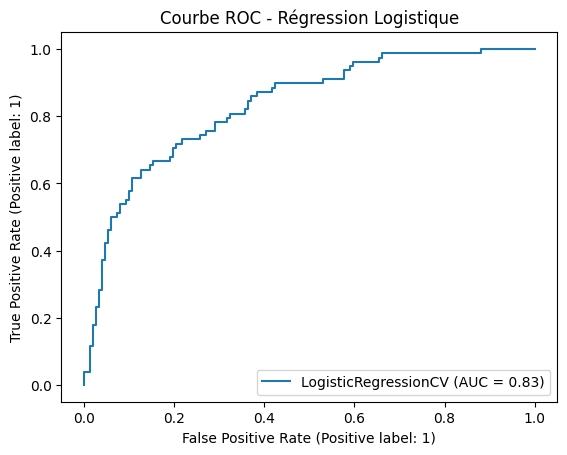

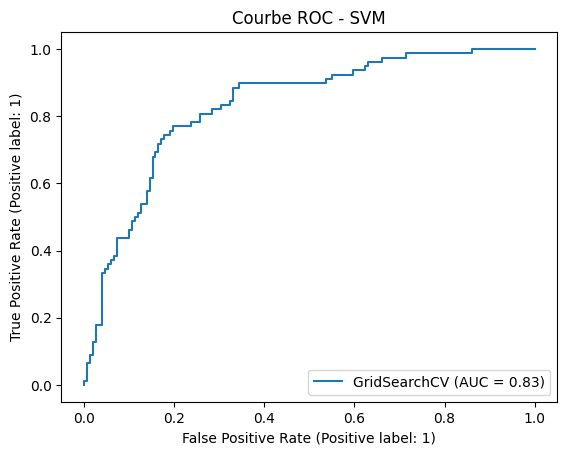

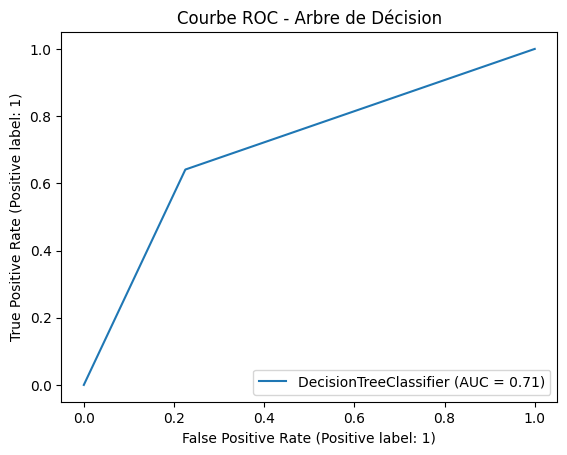

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


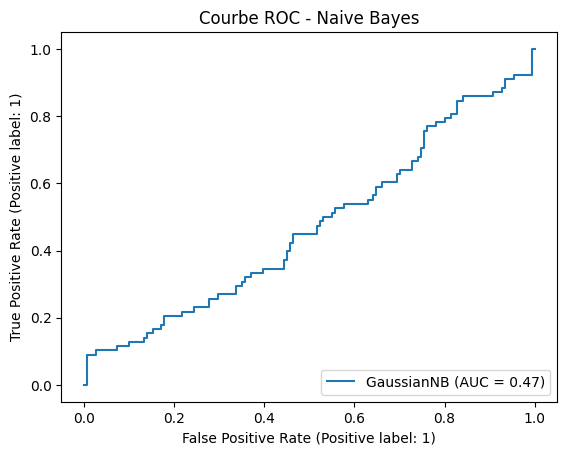

In [ ]:
from sklearn.metrics import RocCurveDisplay

# Régression Logistique
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)
plt.title('Courbe ROC - Régression Logistique')
plt.show()

# SVM
RocCurveDisplay.from_estimator(grid_svc, scaled_X_test, y_test)
plt.title('Courbe ROC - SVM')
plt.show()

# KNN
# RocCurveDisplay.from_estimator(knn, scaled_X_test, y_test)
# plt.title('Courbe ROC - KNN')
# plt.show()

# Arbre de Décision
RocCurveDisplay.from_estimator(tree_model, scaled_X_test, y_test)
plt.title('Courbe ROC - Arbre de Décision')
plt.show()

# Naive Bayes
RocCurveDisplay.from_estimator(naive_model, scaled_X_test_NB, y_test)
plt.title('Courbe ROC - Naive Bayes')
plt.show()
